In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import matplotlib.ticker as mtick

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')



In [28]:
os.listdir(r'C:\Users\k\Desktop\Python1\Covid19_Analysis')

['Covid19_Analysis.ipynb', 'Covid_19.csv']

In [29]:

Data=pd.read_csv(os.path.join('Covid_19.csv'))
Data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [30]:
Data.shape

(49068, 10)

In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [32]:
Data.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [33]:
Data.duplicated().sum()

np.int64(0)

In [34]:
Data=Data.drop('Province/State', axis=1)

In [35]:
Data.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [36]:
Data['Date']= pd.to_datetime(Data['Date'])

In [37]:
Data.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


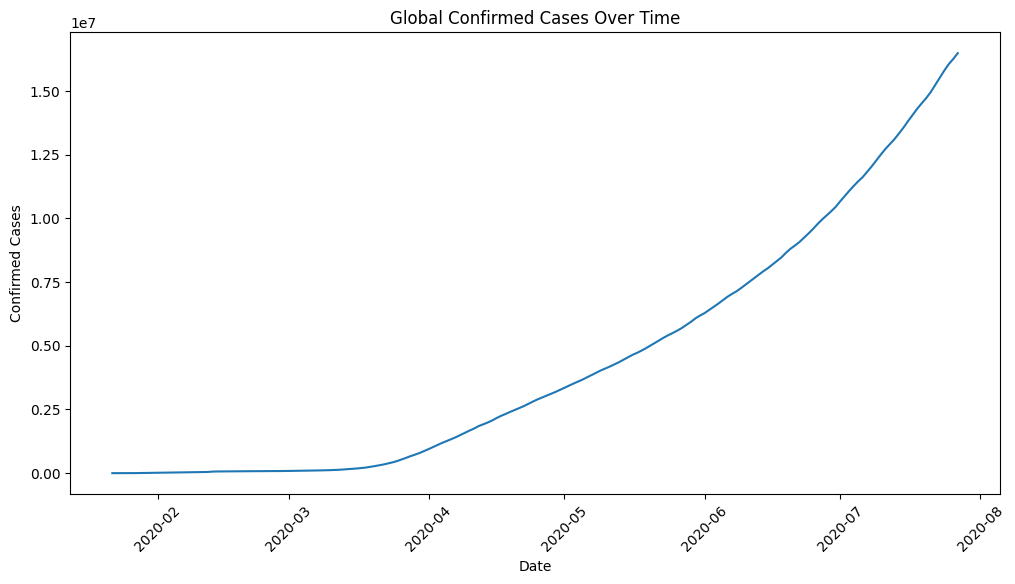

In [38]:
#Global Daily Trend
global_daily = Data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


#plotting graph for Daily confirmed cases

plt.figure(figsize=(12,6))
plt.plot(global_daily['Date'], global_daily['Confirmed'])
plt.title("Global Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


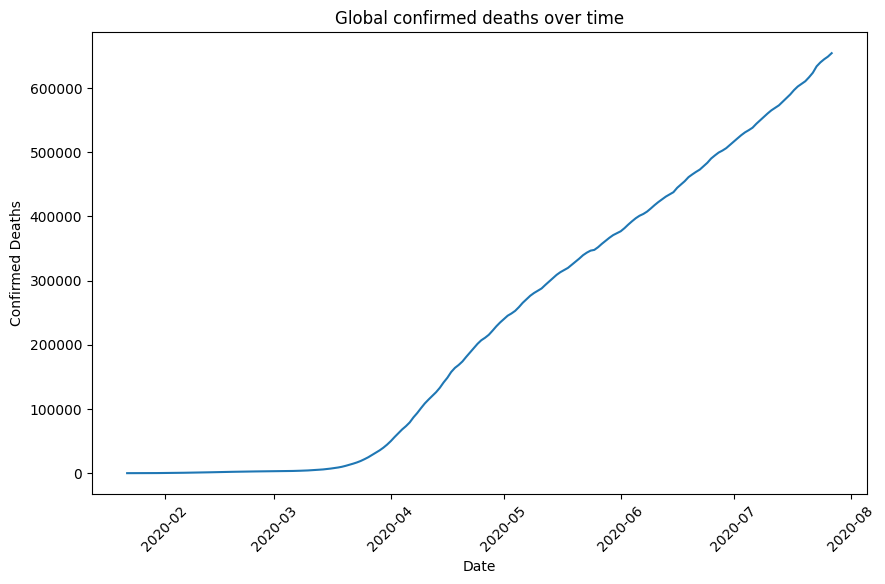

In [39]:
#plotting graph for Daily Deaths

plt.figure(figsize=(10,6))

plt.plot(global_daily['Date'], global_daily['Deaths'])
plt.title('Global confirmed deaths over time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.xticks(rotation=45)
plt.show()

In [40]:
#Plotting Top 10 countries with most active cases

latest_Date=Data['Date'].max()
latest_data=Data[Data['Date']==latest_Date]

top_10=latest_data.sort_values('Confirmed' ,ascending=False).head(10)
top_10

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49030,US,40.000000,-100.000000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,Brazil,-14.235000,-51.925300,2020-07-27,2442375,87618,1846641,508116,Americas
48936,India,20.593684,78.962880,2020-07-27,1480073,33408,951166,495499,South-East Asia
48992,Russia,61.524010,105.318756,2020-07-27,816680,13334,602249,201097,Europe
49005,South Africa,-30.559500,22.937500,2020-07-27,452529,7067,274925,170537,Africa
48963,Mexico,23.634500,-102.552800,2020-07-27,395489,44022,303810,47657,Americas
48986,Peru,-9.190000,-75.015200,2020-07-27,389717,18418,272547,98752,Americas
48854,Chile,-35.675100,-71.543000,2020-07-27,347923,9187,319954,18782,Americas
49028,United Kingdom,55.378100,-3.436000,2020-07-27,300111,45759,0,254352,Europe
48938,Iran,32.427908,53.688046,2020-07-27,293606,15912,255144,22550,Eastern Mediterranean


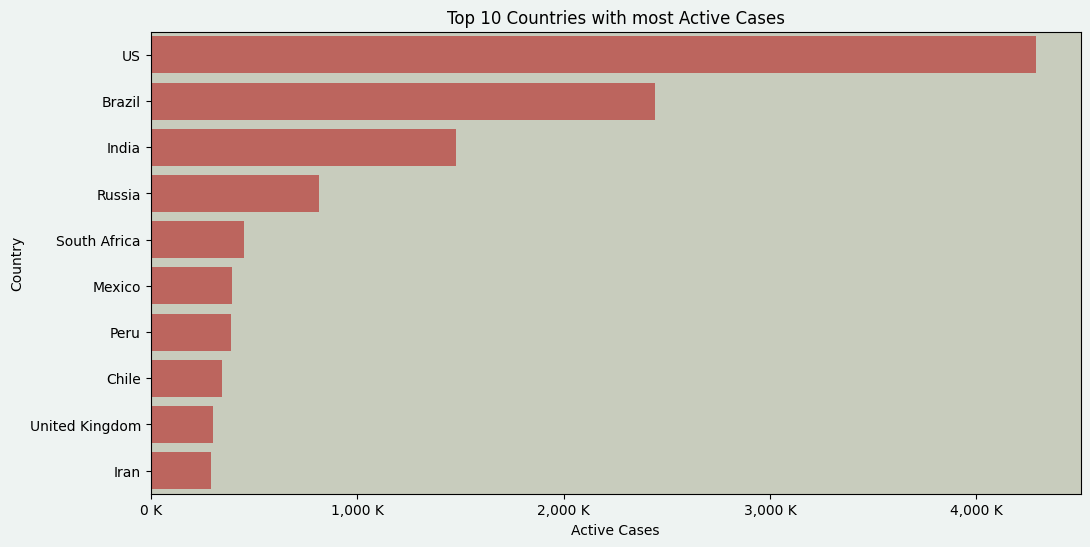

In [41]:
plt.figure(figsize=(12,6),facecolor="#6F97901D")

ax= sns.barplot(x='Confirmed', y='Country/Region', data=top_10, color='#CC574E')
ax.set_facecolor("#a6a88c83")

plt.title('Top 10 Countries with most Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,  pos: f'{x/1000:,.0f} K'))
plt.show()


In [42]:

global_daily = Data.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig_map = px.choropleth(global_daily, locations="Country/Region", locationmode='country names',
                        color="Confirmed", hover_name="Country/Region", 
                        animation_frame=global_daily["Date"].dt.strftime('%Y-%m-%d'),
                        title="World Spread Over Time", color_continuous_scale=px.colors.sequential.Plasma)
fig_map.show()

In [43]:
# COUNTRY COMPARISON

p=px.line(global_daily, x="Date", y="Confirmed", color="Country/Region",
                  log_y=True, title="Confirmed Cases Comparison")

p.show()

In [44]:
# MORTALITY RATE ANALYSIS

latest_data['Death_Rate'] = latest_data['Deaths'] / latest_data['Confirmed']
latest_data['Death_Rate'] = latest_data['Death_Rate'].fillna(0)

top_mortality = latest_data.sort_values('Death_Rate', ascending=False).head(10)


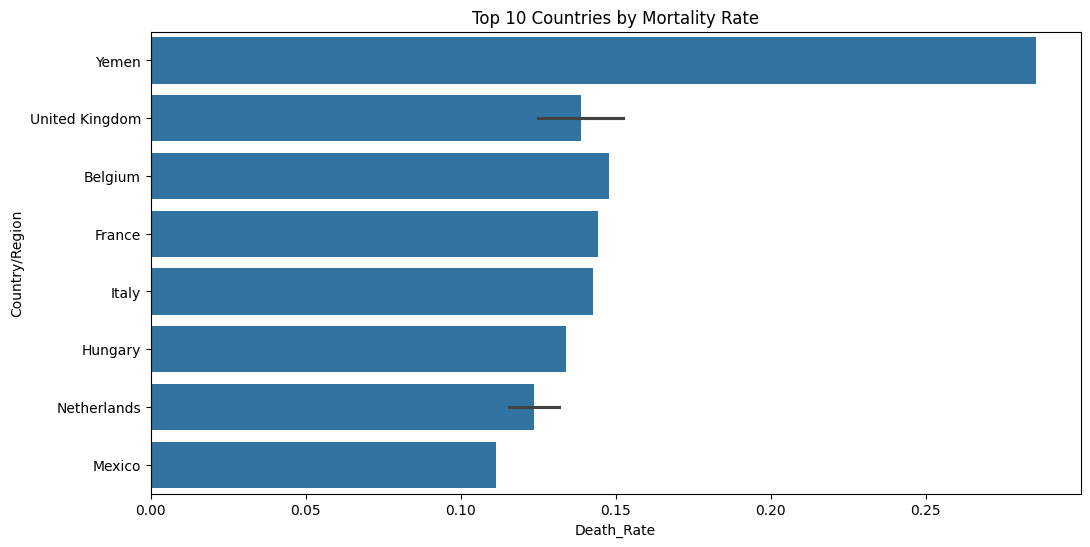

In [47]:
plt.figure(figsize=(12,6))

sns.barplot(x='Death_Rate', y='Country/Region', data=top_mortality)
plt.title("Top 10 Countries by Mortality Rate")
plt.show()

